In [657]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [658]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential

In [659]:
data = pd.read_csv('kc_house_data.csv')

In [660]:
pd.pandas.set_option('max_columns',None)

In [661]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [662]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [663]:
data.drop(columns=['id','date','yr_renovated'],inplace=True)

In [664]:
data.set_index('yr_built',inplace=True)

In [665]:
data['zipcode'].value_counts()[:10]

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
Name: zipcode, dtype: int64

In [666]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [667]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [668]:
data.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [669]:
data.shape

(21613, 17)

## Data Transformation

In [670]:
data.groupby('zipcode').mean()['price'].sort_values(ascending=False).index

Int64Index([98039, 98004, 98040, 98112, 98102, 98109, 98105, 98006, 98119,
            98005, 98033, 98199, 98075, 98074, 98077, 98053, 98177, 98008,
            98052, 98122, 98115, 98116, 98007, 98027, 98029, 98144, 98103,
            98024, 98107, 98117, 98072, 98136, 98065, 98034, 98059, 98011,
            98070, 98125, 98166, 98028, 98014, 98045, 98019, 98126, 98155,
            98010, 98056, 98118, 98133, 98038, 98146, 98108, 98058, 98092,
            98106, 98022, 98042, 98178, 98055, 98198, 98031, 98030, 98003,
            98188, 98023, 98148, 98001, 98032, 98168, 98002],
           dtype='int64', name='zipcode')

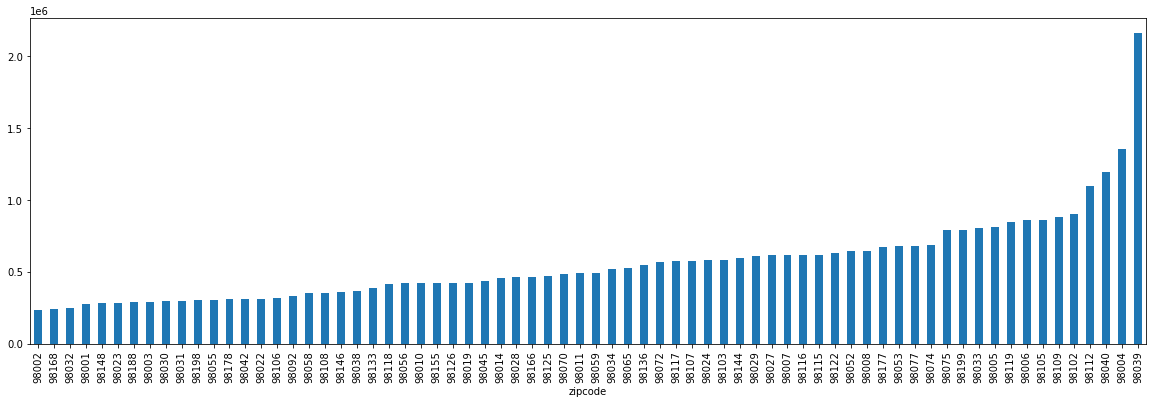

In [671]:
data.groupby('zipcode').mean()['price'].sort_values().plot(kind='bar',figsize=(20,6))
plt.show()

In [672]:
zipcode = data.groupby('zipcode').mean()['price'].sort_values().index

In [673]:
zipcode = np.asarray(zipcode)
zipcode

array([98002, 98168, 98032, 98001, 98148, 98023, 98188, 98003, 98030,
       98031, 98198, 98055, 98178, 98042, 98022, 98106, 98092, 98058,
       98108, 98146, 98038, 98133, 98118, 98056, 98010, 98155, 98126,
       98019, 98045, 98014, 98028, 98166, 98125, 98070, 98011, 98059,
       98034, 98065, 98136, 98072, 98117, 98107, 98024, 98103, 98144,
       98029, 98027, 98007, 98116, 98115, 98122, 98052, 98008, 98177,
       98053, 98077, 98074, 98075, 98199, 98033, 98005, 98119, 98006,
       98105, 98109, 98102, 98112, 98040, 98004, 98039], dtype=int64)

In [674]:
zipcode =[x for x in zipcode]

In [675]:
zipcode

[98002,
 98168,
 98032,
 98001,
 98148,
 98023,
 98188,
 98003,
 98030,
 98031,
 98198,
 98055,
 98178,
 98042,
 98022,
 98106,
 98092,
 98058,
 98108,
 98146,
 98038,
 98133,
 98118,
 98056,
 98010,
 98155,
 98126,
 98019,
 98045,
 98014,
 98028,
 98166,
 98125,
 98070,
 98011,
 98059,
 98034,
 98065,
 98136,
 98072,
 98117,
 98107,
 98024,
 98103,
 98144,
 98029,
 98027,
 98007,
 98116,
 98115,
 98122,
 98052,
 98008,
 98177,
 98053,
 98077,
 98074,
 98075,
 98199,
 98033,
 98005,
 98119,
 98006,
 98105,
 98109,
 98102,
 98112,
 98040,
 98004,
 98039]

In [676]:
label = list(range(len(zipcode)))

In [677]:
directory = {}
for i in label:
    directory[zipcode[i]] = i

In [721]:
directory

{98002: 0,
 98168: 1,
 98032: 2,
 98001: 3,
 98148: 4,
 98023: 5,
 98188: 6,
 98003: 7,
 98030: 8,
 98031: 9,
 98198: 10,
 98055: 11,
 98178: 12,
 98042: 13,
 98022: 14,
 98106: 15,
 98092: 16,
 98058: 17,
 98108: 18,
 98146: 19,
 98038: 20,
 98133: 21,
 98118: 22,
 98056: 23,
 98010: 24,
 98155: 25,
 98126: 26,
 98019: 27,
 98045: 28,
 98014: 29,
 98028: 30,
 98166: 31,
 98125: 32,
 98070: 33,
 98011: 34,
 98059: 35,
 98034: 36,
 98065: 37,
 98136: 38,
 98072: 39,
 98117: 40,
 98107: 41,
 98024: 42,
 98103: 43,
 98144: 44,
 98029: 45,
 98027: 46,
 98007: 47,
 98116: 48,
 98115: 49,
 98122: 50,
 98052: 51,
 98008: 52,
 98177: 53,
 98053: 54,
 98077: 55,
 98074: 56,
 98075: 57,
 98199: 58,
 98033: 59,
 98005: 60,
 98119: 61,
 98006: 62,
 98105: 63,
 98109: 64,
 98102: 65,
 98112: 66,
 98040: 67,
 98004: 68,
 98039: 69}

In [678]:
data['zipcode']=data['zipcode'].map(directory)

In [679]:
data['zipcode']

yr_built
1955    12
1951    32
1933    30
1965    38
1987    56
        ..
2009    43
2014    19
2009    44
2004    46
2008    44
Name: zipcode, Length: 21613, dtype: int64

In [680]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,
1955,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,12,47.5112,-122.257,1340,5650
1951,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,32,47.7210,-122.319,1690,7639
1933,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,30,47.7379,-122.233,2720,8062
1965,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,38,47.5208,-122.393,1360,5000
1987,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,56,47.6168,-122.045,1800,7503


In [681]:
x= data.drop(columns=['price'])
y = data['price']

In [682]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42)

In [683]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [684]:
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

In [685]:
x_train.shape,x_test.shape

((17290, 16), (4323, 16))

In [686]:
input_dim=x_train.shape[1]
input_dim

16

## Build The Model

In [687]:
model = Sequential()
model.add(Dense(700,activation='relu',kernel_initializer='normal',input_dim=input_dim))
model.add(Dropout(0.20))
model.add(Dense(500,activation='relu',kernel_initializer='normal'))
model.add(Dense(256,activation='relu',kernel_initializer='normal'))
model.add(Dense(125,activation='relu',kernel_initializer='normal'))
model.add(Dense(84,activation='relu',kernel_initializer='normal'))
model.add(Dense(50,activation='relu',kernel_initializer='normal'))
model.add(Dense(25,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam', metrics=['mse','mae'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 700)               11900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_65 (Dense)             (None, 256)               128256    
_________________________________________________________________
dense_66 (Dense)             (None, 125)               32125     
_________________________________________________________________
dense_67 (Dense)             (None, 84)                10584     
_________________________________________________________________
dense_68 (Dense)             (None, 50)              

In [688]:
history = model.fit(x_train, y_train, epochs=150, batch_size=100,  verbose=1, validation_split=0.2)

Train on 13832 samples, validate on 3458 samples
Epoch 1/150
13832/13832 [==============================] - 4s 285us/sample - loss: 194729936492.6778 - mse: 194729902080.0000 - mae: 302970.3438 - val_loss: 31501604832.0185 - val_mse: 31501604864.0000 - val_mae: 120260.9688
Epoch 2/150
13832/13832 [==============================] - 2s 174us/sample - loss: 31109760729.0596 - mse: 31109758976.0000 - mae: 108382.3281 - val_loss: 31636035764.0440 - val_mse: 31636035584.0000 - val_mae: 120486.0859
Epoch 3/150
13832/13832 [==============================] - 2s 162us/sample - loss: 28049400263.7363 - mse: 28049401856.0000 - mae: 102518.6250 - val_loss: 21965809639.7178 - val_mse: 21965809664.0000 - val_mae: 95650.8672
Epoch 4/150
13832/13832 [==============================] - 2s 163us/sample - loss: 27059737117.6125 - mse: 27059734528.0000 - mae: 98887.7266 - val_loss: 20911435988.6177 - val_mse: 20911435776.0000 - val_mae: 91009.9219
Epoch 5/150
13832/13832 [==============================] - 2

In [689]:
history.history

{'loss': [194729936492.67786,
  31109760729.05957,
  28049400263.736263,
  27059737117.61249,
  26238282956.030075,
  25637930030.04743,
  24772124337.37883,
  25099548942.065933,
  24426797430.894157,
  23712696600.134182,
  22851152650.660496,
  23410014987.548874,
  22375416141.288605,
  22486915342.806248,
  21879793709.899364,
  21172855922.304222,
  20969831550.445343,
  20864252099.44245,
  21329478816.795837,
  21199993447.3476,
  20401526512.601505,
  19801527667.93291,
  19730914070.94968,
  19524135133.945633,
  18995387718.033546,
  18934174816.536728,
  18038939641.485252,
  17867265912.522846,
  17727435747.72007,
  18238569982.66744,
  17822456883.969925,
  17173218938.00347,
  17799447173.84847,
  17366870307.831116,
  17454791901.945633,
  16711833881.318682,
  16371086321.04569,
  16425444023.005205,
  16212082427.262001,
  16716613713.13823,
  15619816594.729902,
  16913362993.600925,
  15279098419.969925,
  15255528232.124928,
  15340708709.422789,
  15204563602.877

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


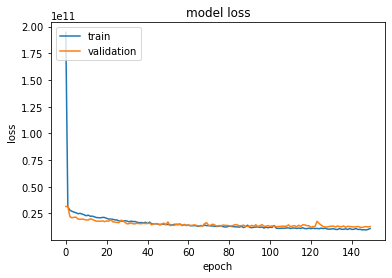

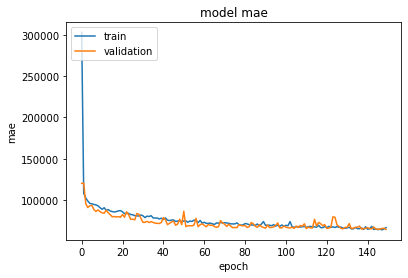

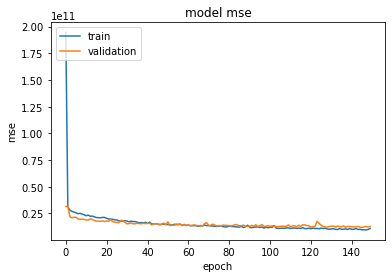

In [690]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [691]:
y_predict = model.predict(x_test)

In [692]:
final_result = pd.DataFrame(dict(Actual=y_test,Predicted=y_predict.flatten()))

In [693]:
final_result.head()

,Actual,Predicted
0,365000.0,3.675608e+05
1,865000.0,9.005044e+05
2,1038000.0,1.108443e+06
3,1490000.0,1.761900e+06
4,711000.0,6.910798e+05


In [694]:
final_result['Actual'][0],final_result['Predicted'][0]

(365000.0, 367560.84)

In [695]:
print('R2_score :-',r2_score(y_test,y_predict))

R2_score :- 0.876368267313581


## Evalution of model.

In [722]:
evalution = model.evaluate(x_test,y_test,batch_size=30,verbose=1)

4323/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [727]:
print('validation MSE',evalution[0])
print('validation MAE',evalution[1])

validation MSE 18690238822.373352
validation MAE 18690240000.0


In [706]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [707]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,
1955,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,12,47.5112,-122.257,1340,5650


When we have,

- Bedrooms = 4
- bathrooms =3
- sqft_living = 1500
- floors =1
- waterview =0
- view =0
- condition=3
- grade =7
- sqft_above=1200
- sqft_basement=0
- zipcode = 98042
- lat = 50.77
- long =-122.257
- sqft_living15=1200
- sqft_lot15 = 5000

In [708]:
x_new =np.array([[4,2,1500,6000,1,0,0,2,7,1200,0,13,50.77,-300,1200,5000]])

In [751]:
x_new = np.array([[4,4,1500,6000,1,0,0,2,7,1200,0,13,50.77,-300,1200,5000]])
x_new = scaler.fit_transform(x_new)
y_new = model.predict(x_new)
y_new

array([[529084.06]], dtype=float32)

According to the our linear regression model we have got the price of house is `529084.06`.

In [747]:
x_intercept = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
x_int = scaler.fit_transform(x_intercept)
y_predict = model.predict(x_int)
y_predict

array([[529084.06]], dtype=float32)

In [790]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.575892,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.098946,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.216738,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.272405,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.025121,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.164758,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.014627,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.098301,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.031186,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.367464,0.114084,0.198372,0.713202,0.119248


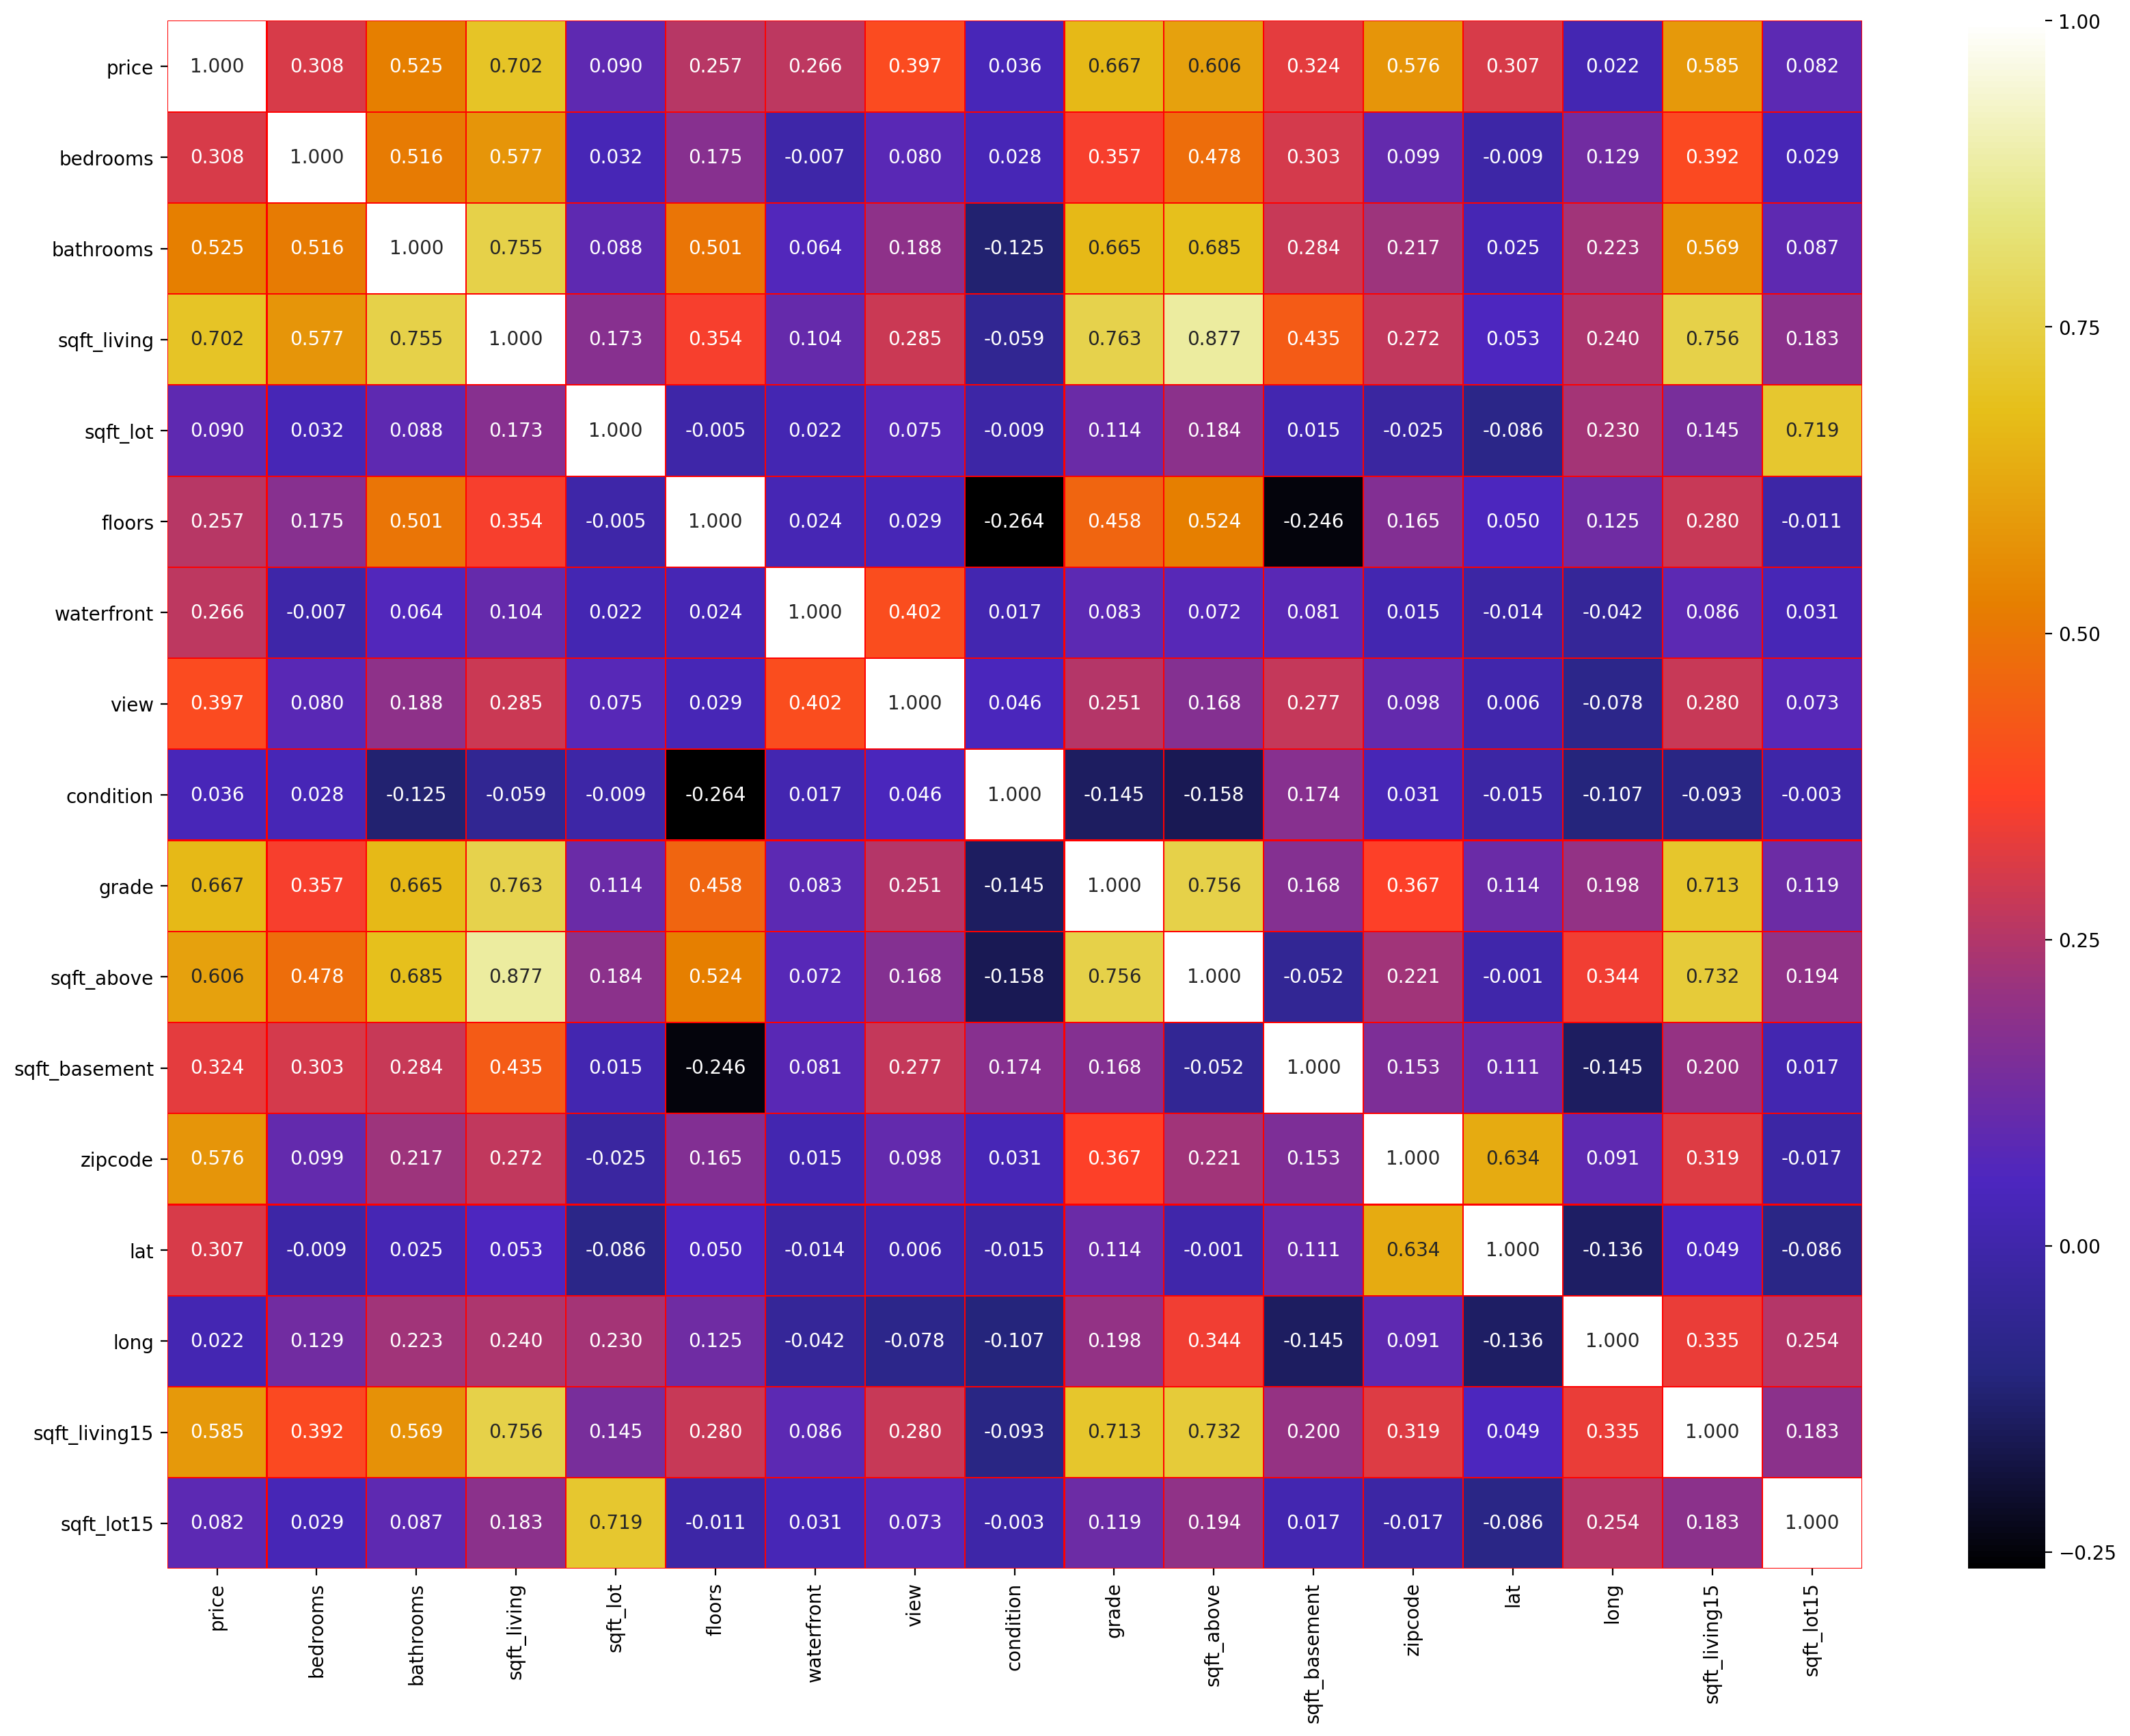

In [816]:
plt.figure(figsize=(20,15),dpi=200)
sns.heatmap(data.corr(),fmt='.3f',annot=True,cmap=plt.get_cmap('CMRmap'),linecolor='red',linewidths=0.4,vmax=1)
plt.show()

# Statsmodels

In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. ... Under these conditions, the method of OLS provides minimum-variance mean-unbiased estimation when the errors have finite variances.

A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [729]:
import statsmodels.api as sms

In [730]:
from statsmodels.regression.linear_model import OLS

`OLS = Ordinary Least squares`

In [732]:
x_constant = sms.add_constant(x)

In [753]:
x_constant.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,
1955,1.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,12,47.5112,-122.257,1340,5650
1951,1.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,32,47.7210,-122.319,1690,7639
1933,1.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,30,47.7379,-122.233,2720,8062
1965,1.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,38,47.5208,-122.393,1360,5000
1987,1.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,56,47.6168,-122.045,1800,7503


As you can see, the sm.add_constant() added a const vector (column) to our dataframe that is simply a vector of ones. This is used to represent 𝐵₀, the intercept. Now let's fit the model.

In [733]:
ols_model = OLS(y,x_constant).fit()

In [734]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     4252.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:04:46   Log-Likelihood:            -2.9275e+05
No. Observations:               21613   AIC:                         5.855e+05
Df Residuals:                   21597   BIC:                         5.857e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.993e+07    1.3e+06    -38.360      0.000   -5.25e+07   -4.74e+07
bedrooms      -2.722e+04   1731.547    -15.721      0.000   -3.06e+04   -2.38e+04
bathrooms      1.171e+04   2815.037      4.161      0.000    6195.926    1.72e+04
sqft_living     125.9313      2.051     61.391      0.000     121.911     129.952
sqft_lot          0.2567      0.044      5.841      0.000       0.171       0.343
floors        -4.477e+04   3222.654    -13.892      0.000   -5.11e+04   -3.85e+04
waterfront     6.055e+05   1.59e+04     38.062      0.000    5.74e+05    6.37e+05
view           5.631e+04   1943.882     28.967      0.000    5.25e+04    6.01e+04
condition      3.172e+04   2048.797     15.484      0.000    2.77e+04    3.57e+04
grade          4.915e+04   1958.675     25.092      0.000    4.53e+04     5.3e+04
sqft_above       96.2996      2.071     46.500      0.000      92.240     100.359
sqft_basement    29.6303      2.430     12.195      0.000      24.868      34.393
zipcode        7544.2760     96.160     78.456      0.000    7355.796    7732.756
lat            1.563e+04   1.23e+04      1.268      0.205   -8531.371    3.98e+04
long          -3.983e+05   1.05e+04    -38.059      0.000   -4.19e+05   -3.78e+05
sqft_living15    -7.2546      3.176     -2.285      0.022     -13.479      -1.030
sqft_lot15       -0.3062      0.067     -4.553      0.000      -0.438      -0.174
==============================================================================
Omnibus:                    21074.324   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3501203.777
Skew:                           4.329   Prob(JB):                         0.00
Kurtosis:                      64.749   Cond. No.                     1.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.26e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [752]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     4252.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:24:40   Log-Likelihood:            -2.9275e+05
No. Observations:               21613   AIC:                         5.855e+05
Df Residuals:                   21597   BIC:                         5.857e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.993e+07    1.3e+06    -38.360

Here’s your first regression model. That’s a lot of information to digest at once. Let’s start to break this down

### R-squared

`𝑅²:` Also known as the coefficient of determination. By definition, it is the proportion of variance in y that is explained by X, shown in the equation below

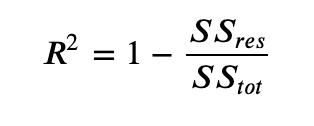

In [754]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/r2.png')

`ss_total = (y_actual-y_mean)2`

`ss_res = (y_actual - y_predicted)2`



From the above we can say the `ss_total` sould be greater than the `ss_residual` in order to obtain the `+ve` `R2 score` else we will get the `-ve R2 score.`

- But what does that even mean?
- 𝑅² is basically how well the model explains the data.
- A value of 1.0 means that the variance in the y-values are 100% explained by the X-values.
- A negative 𝑅² value means that using the average value of y is a better predictor than the regression model.
- 𝑅² is also just the square term of the correlation coefficient 𝑅.

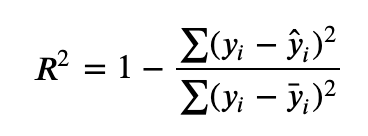

In [755]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/r22.png')

In the above model the `p>|t|` should be less so that we can consider that feature for the target variable is significant.

### Adjusted R-squared and Feature hacking

`Adjusted 𝑅²` is simply `𝑅² adjusted by the number of predictors (X-variables).`

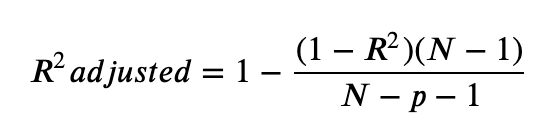

In [756]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/adjustd.png')

- where `p` is the `number of predictors` and `N` is the `number of observations.`

- It’s important to understand that as you add more features (X-variables) to your model, your 𝑅² will begin to approach 1.0, even if the features are nonsense. I’ll illustrate this below:

### Beta Coefficients

Taking a look back at our Statmodels output, we can extract the coefficients summary below:

In [757]:
ols_model.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-4.993292e+07,1.301696e+06,-38.359889,0.000000e+00,-5.248434e+07,-4.738150e+07
bedrooms,-2.722209e+04,1.731547e+03,-15.721256,2.194329e-55,-3.061605e+04,-2.382813e+04
bathrooms,1.171361e+04,2.815037e+03,4.161085,3.179651e-05,6.195926e+03,1.723129e+04
sqft_living,1.259313e+02,2.051285e+00,61.391409,0.000000e+00,1.219106e+02,1.299520e+02
sqft_lot,2.566867e-01,4.394932e-02,5.840514,5.278596e-09,1.705427e-01,3.428306e-01
floors,-4.476896e+04,3.222654e+03,-13.891955,1.092806e-43,-5.108560e+04,-3.845232e+04
waterfront,6.054799e+05,1.590761e+04,38.062289,7.045108e-307,5.742998e+05,6.366600e+05
view,5.630892e+04,1.943882e+03,28.967249,4.895152e-181,5.249876e+04,6.011907e+04
condition,3.172302e+04,2.048797e+03,15.483735,8.695795e-54,2.770723e+04,3.573881e+04
grade,4.914714e+04,1.958675e+03,25.092035,5.556189e-137,4.530799e+04,5.298628e+04


- The `Coef. column` represent the value of the `Beta Coefficients.` 

- In this case, the `Coef`. for `const` is the intercept term, 

- and the Coef. for other columnns is the slope of the regression line. 

- A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.



- The model is stating that as the dependent variable increase by 1, other paramter will decrease or increase by their values.


- This interpretation is incredibly useful, and one of the most common inferences in Data Science.


### The Std.Err.

Is the error associated with the Beta coefficients. It's important to be aware that the Standard Error estimates can be skewed if the feature itself is not normally distributed (which is why you may commonly see log-transforms in practice). We won't go into this now, but like I said, be aware of it.

### P>|t| 


- It is a hypothesis test that tests if the associated Beta Coefficient is non-zero, and is therefore significantly associated with the dependent variabe, y. 

- If you are not familiar with hypothesis tests, you can use the rule of thumb that if you see `P>|t|` of `< 0.05`, the Beta coeficient is signficant In this case, both Beta Coefficients are significant.

- When `p_values >0.05` that is indicate the `non-significant feature` in the relevance of the `target variable.` 
- When `p_values <=0.05` that is indicating the the `significant feature` in the relevance of the `target variable.` 

- A side note: while `P>|t| < 0.05` is extremely common in practice, it is a dangerous and arbitrary assumption. I recommend exploring hypothesis testing further on your own.
- `[0.025 0.975]` is the `95%` confidence interval of the `Beta Coefficient.`

## Summary

- As a rule of thumb, when reading these summaries you should look for 3 things:
- A high 𝑅²
- The coeficient values
- A P>|t| hypothesis test less than 0.05
- The adjusted 𝑅² is pretty close to the 𝑅² value which is a good sign.
- The Beta Coefficient Age is not significant since P>|t| > 0.05. We should drop this from our model. We should do this before we try to interpret any other coefficients, because if there is multicollinearity between predictors, it can throw off their hypothesis tests and β coefficients. As a rule of thumb, drop the feature with the highest p-value (P>|t| value) first before judging any of the other features.

- Multicollinearity is when two of your models features are correlated to each other. So if weight and age were correlated with each other, that would be considered multicollinearity. Wikipedia says it best:

- Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

- Multicollinearity is something you will have to be very comfortable with later on, but for now, as a beginner, it is sufficient to simply be wary of it.
- Let’s drop the insignificant feature age, and re-fit the model.

In [758]:
import seaborn as sns

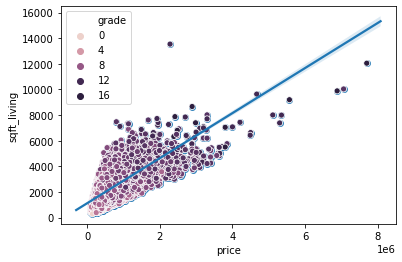

In [765]:
sns.regplot(data['price'], data['sqft_living'])
sns.scatterplot(data['price'], data['sqft_living'], hue = data['grade'] ,color='green')
plt.show()

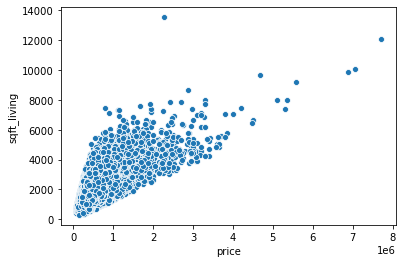

In [771]:
sns.scatterplot(data['price'], data['sqft_living'])

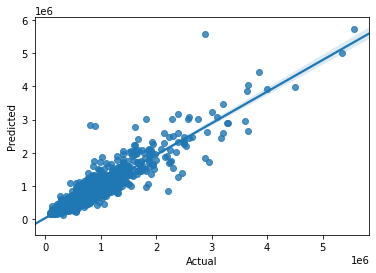

In [777]:
sns.regplot(y_test.flatten(), model.predict(x).flatten())
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [780]:
x = scaler.fit_transform(x)

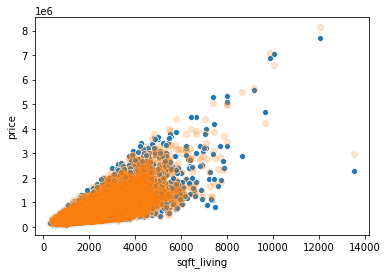

In [783]:
sns.scatterplot(data['sqft_living'], data['price'])
plt.scatter(data['sqft_living'], model.predict(x), alpha=0.2)

In [784]:
ols_model.resid

yr_built
1955     54649.425782
1951    -57474.665811
1933      5639.923702
1965     14075.392972
1987    -75113.520253
            ...      
2009   -133198.987345
2014   -103729.985479
2009     29104.953731
2004    -64523.570144
2008    -48120.070516
Length: 21613, dtype: float64

Since our residual is normaly distributed that is indicated our model is good.


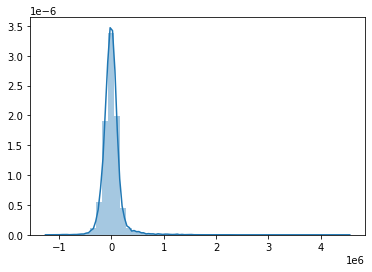

In [786]:
sns.distplot(ols_model.resid)
print('Since our residual is normaly distributed that is indicated our model is good.')
plt.show()

In [738]:
ols_model.pvalues

const             0.000000e+00
bedrooms          2.194329e-55
bathrooms         3.179651e-05
sqft_living       0.000000e+00
sqft_lot          5.278596e-09
floors            1.092806e-43
waterfront       7.045108e-307
view             4.895152e-181
condition         8.695795e-54
grade            5.556189e-137
sqft_above        0.000000e+00
sqft_basement     4.287162e-34
zipcode           0.000000e+00
lat               2.047980e-01
long             8.010032e-307
sqft_living15     2.235010e-02
sqft_lot15        5.310305e-06
dtype: float64

## Thank You !!